In [3]:
import requests
import dotenv
import os
import base64
from PIL import Image
import uuid
import io
dotenv.load_dotenv('../.env')
firworks_api_key = os.getenv("FIREWORKS_API_KEY")
def generate_image(prompt):
    url = "https://api.fireworks.ai/inference/v1/image_generation/accounts/fireworks/models/stable-diffusion-xl-1024-v1-0"

    payload = {
        "height": 1024,
        "width": 1024,
        "text_prompts": [
            {
                "weight": 1,
                "text": prompt
            }
        ],
        "cfg_scale": 7,
        "samples": 1,
        "seed": 0,
        "steps": 50,
        "safety_check": False
    }
    headers = {
        "accept": "application/json",
        "content-type": "application/json",
        "authorization": f"Bearer {firworks_api_key}"
    }

    response = requests.post(url, json=payload, headers=headers)
    base64_image = response.json()[0]['base64']
    image_bytes = base64.b64decode(base64_image)
    image = Image.open(io.BytesIO(image_bytes))
    # filename_generation using uuid
    uuid_value = uuid.uuid4()
    filename = f"{uuid_value}.png"
    image.save(filename)
    return filename

# Usage
# response = generate_image("hill with greenary")
# from IPython.display import Image, display
# import base64

# base64_image = response.json()[0]['base64']
# image_bytes = base64.b64decode(base64_image)
# display(Image(image_bytes))

# from PIL import Image

# # Save the image locally
# image = Image(image_bytes)
# image.save("image.png")

In [4]:
location = generate_image("hill with greenary")
print(location)


459c5e59-611b-4af4-9a6b-4c3613389d90.png


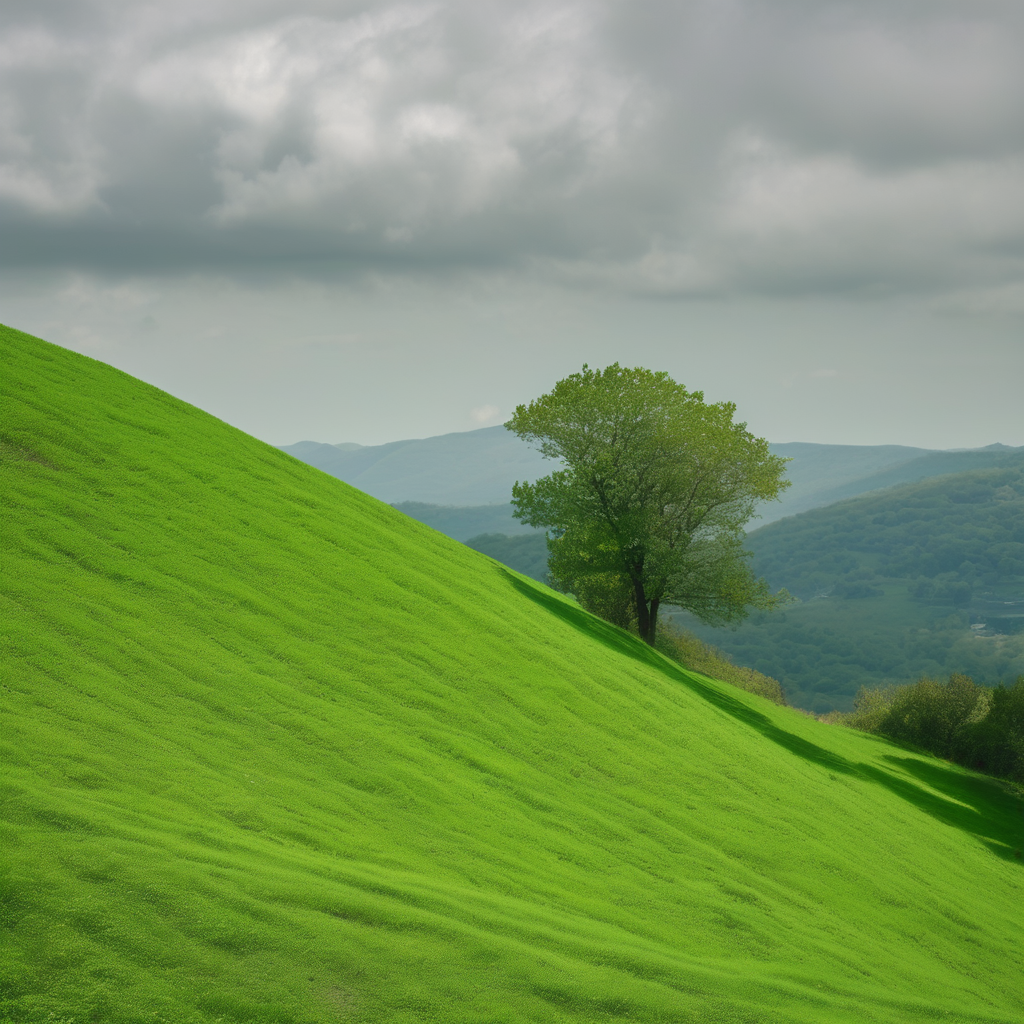

In [5]:
from IPython.display import Image, display
display(Image(filename=location))

In [1]:
import requests
import dotenv
import os
import base64
from PIL import Image
import uuid
import io
dotenv.load_dotenv('../.env')
firworks_api_key = os.getenv("FIREWORKS_API_KEY")
def generate_image(prompt,filename=None):
    url = "https://api.fireworks.ai/inference/v1/image_generation/accounts/fireworks/models/stable-diffusion-xl-1024-v1-0"

    payload = {
        "height": 1024,
        "width": 1024,
        "text_prompts": [
            {
                "weight": 1,
                "text": prompt
            }
        ],
        "cfg_scale": 7,
        "samples": 1,
        "seed": 0,
        "steps": 50,
        "safety_check": False
    }
    headers = {
        "accept": "application/json",
        "content-type": "application/json",
        "authorization": f"Bearer {firworks_api_key}"
    }

    response = requests.post(url, json=payload, headers=headers)
    base64_image = response.json()[0]['base64']
    image_bytes = base64.b64decode(base64_image)
    image = Image.open(io.BytesIO(image_bytes))
    # filename_generation using uuid
    uuid_value = uuid.uuid4()
    if filename is None:
        filename = f"{uuid_value}.png"
    
    image.save(filename)
    return filename

# Usage
# response = generate_image("hill with greenary")
# from IPython.display import Image, display
# import base64

# base64_image = response.json()[0]['base64']
# image_bytes = base64.b64decode(base64_image)
# display(Image(image_bytes))

# from PIL import Image

# # Save the image locally
# image = Image(image_bytes)
# image.save("image.png")

In [2]:

output_location = "../../frontend/images/"
# read json
import json
with open('../../frontend/psycometry.json') as f:
    data = json.load(f)
    

In [9]:
for questions in data:
    
    prompt_list = questions["option_list"]
    for prompt in prompt_list:
        output_results = f"{output_location}"+f"{prompt['Image']}"
        location = generate_image(prompt['Text_input'],output_results)
        print(location)

../../frontend/images/hiking.jpg
../../frontend/images/swimming.jpg
../../frontend/images/camping.jpg
../../frontend/images/cycling.jpg
../../frontend/images/gardening.jpg
../../frontend/images/classical.jpg
../../frontend/images/rock.jpg
../../frontend/images/jazz.jpg
../../frontend/images/pop.jpg
../../frontend/images/electronic.jpg
../../frontend/images/reading.jpg
../../frontend/images/meditation.jpg
../../frontend/images/yoga.jpg
../../frontend/images/bath.jpg
../../frontend/images/walk.jpg
../../frontend/images/italian.jpg
../../frontend/images/chinese.jpg
../../frontend/images/mexican.jpg
../../frontend/images/indian.jpg
../../frontend/images/japanese.jpg
../../frontend/images/action.jpg
../../frontend/images/comedy.jpg
../../frontend/images/drama.jpg
../../frontend/images/scifi.jpg
../../frontend/images/documentary.jpg


In [8]:
output_location

'../../frontend/images/'